In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib
# Import additional libraries for handling class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight


In [2]:
df=pd.read_csv('E:\STORAGE\Desktop\CAPSTONE\Movies-Recommendations-and-Sentiment-Analysis\imdb-movies-dataset.csv')

In [4]:
df.head(3)

Poster  \
0  https://m.media-amazon.com/images/M/MV5BYWRkZj...   
1  https://m.media-amazon.com/images/M/MV5BZGI4NT...   
2  https://m.media-amazon.com/images/M/MV5BZjIyOT...   

                               Title    Year Certificate  Duration (min)  \
0                    The Idea of You  2023.0           R           115.0   
1  Kingdom of the Planet of the Apes  2023.0       PG-13           145.0   
2                          Unfrosted  2023.0       PG-13            97.0   

                        Genre  Rating  Metascore           Director  \
0      Comedy, Drama, Romance     6.4       67.0  Michael Showalter   
1   Action, Adventure, Sci-Fi     7.3       66.0           Wes Ball   
2  Biography, Comedy, History     5.5       42.0     Jerry Seinfeld   

                                                Cast   Votes  \
0  Anne Hathaway, Nicholas Galitzine, Ella Rubin,...  28,744   
1  Owen Teague, Freya Allan, Kevin Durand, Peter ...  22,248   
2  Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...  18,401   

                                         Description Review Count  \
0  Solène, a 40-year-old single mom, begins an un...          166   
1  Many years after the reign of Caesar, a young ...          183   
2  In 1963 Michigan, business rivals Kellogg's an...          333   

                             Review Title  \
0                    Hypocrisy as an idea   
1  A phenomenal start to another trilogy!   
2                               not funny   

                                              Review  
0  This film, as well as the reaction to it, is a...  
1  I'm a big fan of all the planet of the apes, a...  
2  Pretty much the worst criticism you can lay on...

In [5]:
# Assuming `df` is your DataFrame
columns = df.columns.tolist()

# Print column names as strings
print(columns)


['Poster', 'Title', 'Year', 'Certificate', 'Duration (min)', 'Genre', 'Rating', 'Metascore', 'Director', 'Cast', 'Votes', 'Description', 'Review Count', 'Review Title', 'Review']


In [6]:
df.head(1)['Review'].values

array(["This film, as well as the reaction to it, is a wonderful example of modern hypocrisy:The story is about an adult woman who is attracted to a young guy, 16 years younger than her, young enough to be her son, whom she sees at his boys band concert, and from people reactions starts from the movie trailer and beyond, we get praise and stories that this is the destruction of the stigma about the happiness of a woman at 40, that she can remain attractive at any age to any man, that happiness is available to anyone and it's not for us to judge someone else's love.But if this were a story about a man who, at the age of 40, attracted to a girl from a girls band, and the girl is 16 years younger than him, we would get stories about a disgusting creep who finds no other way to overcome his midlife crisis than preadatory pursue a girl, young enough to be his daughter."],
      dtype=object)

In [7]:
df.shape

(10000, 15)

In [8]:
df.describe()

Year  Duration (min)       Rating    Metascore
count  9850.000000     9664.000000  9596.000000  7555.000000
mean   2005.761421      108.809603     6.438610    58.068299
std      18.958005       23.159749     1.051412    17.845240
min    1929.000000       45.000000     1.300000     1.000000
25%    1997.000000       95.000000     5.800000    45.500000
50%    2012.000000      105.000000     6.500000    58.000000
75%    2021.000000      118.000000     7.200000    71.000000
max    2025.000000      746.000000     9.700000   100.000000

In [9]:
df.head(3)

Poster  \
0  https://m.media-amazon.com/images/M/MV5BYWRkZj...   
1  https://m.media-amazon.com/images/M/MV5BZGI4NT...   
2  https://m.media-amazon.com/images/M/MV5BZjIyOT...   

                               Title    Year Certificate  Duration (min)  \
0                    The Idea of You  2023.0           R           115.0   
1  Kingdom of the Planet of the Apes  2023.0       PG-13           145.0   
2                          Unfrosted  2023.0       PG-13            97.0   

                        Genre  Rating  Metascore           Director  \
0      Comedy, Drama, Romance     6.4       67.0  Michael Showalter   
1   Action, Adventure, Sci-Fi     7.3       66.0           Wes Ball   
2  Biography, Comedy, History     5.5       42.0     Jerry Seinfeld   

                                                Cast   Votes  \
0  Anne Hathaway, Nicholas Galitzine, Ella Rubin,...  28,744   
1  Owen Teague, Freya Allan, Kevin Durand, Peter ...  22,248   
2  Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...  18,401   

                                         Description Review Count  \
0  Solène, a 40-year-old single mom, begins an un...          166   
1  Many years after the reign of Caesar, a young ...          183   
2  In 1963 Michigan, business rivals Kellogg's an...          333   

                             Review Title  \
0                    Hypocrisy as an idea   
1  A phenomenal start to another trilogy!   
2                               not funny   

                                              Review  
0  This film, as well as the reaction to it, is a...  
1  I'm a big fan of all the planet of the apes, a...  
2  Pretty much the worst criticism you can lay on...

In [9]:
#Title
#Year

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster          10000 non-null  object 
 1   Title           10000 non-null  object 
 2   Year            9850 non-null   float64
 3   Certificate     7370 non-null   object 
 4   Duration (min)  9664 non-null   float64
 5   Genre           9993 non-null   object 
 6   Rating          9596 non-null   float64
 7   Metascore       7555 non-null   float64
 8   Director        9995 non-null   object 
 9   Cast            9961 non-null   object 
 10  Votes           9596 non-null   object 
 11  Description     10000 non-null  object 
 12  Review Count    9999 non-null   object 
 13  Review Title    9483 non-null   object 
 14  Review          9484 non-null   object 
dtypes: float64(4), object(11)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

Poster               0
Title                0
Year               150
Certificate       2630
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Cast                39
Votes              404
Description          0
Review Count         1
Review Title       517
Review             516
dtype: int64

In [12]:
# Step 1: Handle Numerical Columns with Non-Numeric Data
numerical_columns = ['Year', 'Duration (min)', 'Rating', 'Metascore', 'Votes']

for col in numerical_columns:
    # Remove commas (if present) and convert to numeric
    df[col] = df[col].replace(',', '', regex=True).astype(float)

# Step 2: Impute Missing Values for Numerical Columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Step 3: Impute Missing Values for Categorical Columns
df['Certificate'] = df['Certificate'].fillna('Not Rated')  # Replace missing values with 'Not Rated'
df['Genre'] = df['Genre'].fillna('Unknown')               # Replace missing values with 'Unknown'
df['Director'] = df['Director'].fillna('Unknown')         # Replace missing values with 'Unknown'
df['Cast'] = df['Cast'].fillna('Unknown')                 # Replace missing values with 'Unknown'

# Step 4: Impute Missing Values for Text Columns
df['Review Title'] = df['Review Title'].fillna('No Title')  # Replace missing values with 'No Title'
df['Review'] = df['Review'].fillna('No Review')            # Replace missing values with 'No Review'

# Step 5: Drop Rows with Missing Essential Columns
essential_columns = ['Poster', 'Title', 'Rating', 'Votes']
df = df.dropna(subset=essential_columns)

# Step 6: Verify Cleaned Data
print("\nMissing values after handling:")
print(df.isnull().sum())

print("\nData types after cleaning:")
print(df.info())




Missing values after handling:
Poster            0
Title             0
Year              0
Certificate       0
Duration (min)    0
Genre             0
Rating            0
Metascore         0
Director          0
Cast              0
Votes             0
Description       0
Review Count      1
Review Title      0
Review            0
dtype: int64

Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster          10000 non-null  object 
 1   Title           10000 non-null  object 
 2   Year            10000 non-null  float64
 3   Certificate     10000 non-null  object 
 4   Duration (min)  10000 non-null  float64
 5   Genre           10000 non-null  object 
 6   Rating          10000 non-null  float64
 7   Metascore       10000 non-null  float64
 8   Director        10000 non-null  object 
 9   Cast            100

In [13]:
# Step 1: Clean 'Review Count' column
df['Review Count'] = df['Review Count'].replace(',', '', regex=True)  # Remove commas
df['Review Count'] = pd.to_numeric(df['Review Count'], errors='coerce')  # Convert to numeric

# Step 2: Impute missing or invalid values with the median
df['Review Count'] = df['Review Count'].fillna(df['Review Count'].median())

# Step 3: Verify the DataFrame shape and missing values
print("Shape of DataFrame after handling 'Review Count':", df.shape)
print("Missing values in 'Review Count':", df['Review Count'].isnull().sum())


Shape of DataFrame after handling 'Review Count': (10000, 15)
Missing values in 'Review Count': 0


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe is named 'df' and contains categorical features
# Replace 'Your_Categorical_Feature_Column' with actual column names
categorical_features = ['Title', 'Certificate', 'Genre', 'Director', 'Cast', 'Votes', 'Review Count']  # Example features, replace with your features

# Create a dictionary to store LabelEncoders for each feature
label_encoders = {}

# Iterate through categorical features
for feature in categorical_features:
  # Create a new LabelEncoder for each feature
  label_encoders[feature] = LabelEncoder()
  # Fit and transform the feature
  df[feature] = label_encoders[feature].fit_transform(df[feature])

# Calculate confusion matrices for all pairs of categorical features
for i in range(len(categorical_features)):
  for j in range(i + 1, len(categorical_features)):
    feature1 = categorical_features[i]
    feature2 = categorical_features[j]
    
    cm = confusion_matrix(df[feature1], df[feature2])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                # Use the correct LabelEncoder for each feature
                xticklabels=label_encoders[feature2].classes_, 
                yticklabels=label_encoders[feature1].classes_)
    plt.xlabel(feature2)
    plt.ylabel(feature1)
    plt.title(f'Confusion Matrix: {feature1} vs {feature2}')
    plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000221E0115D30> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [14]:
df.shape

(10000, 15)

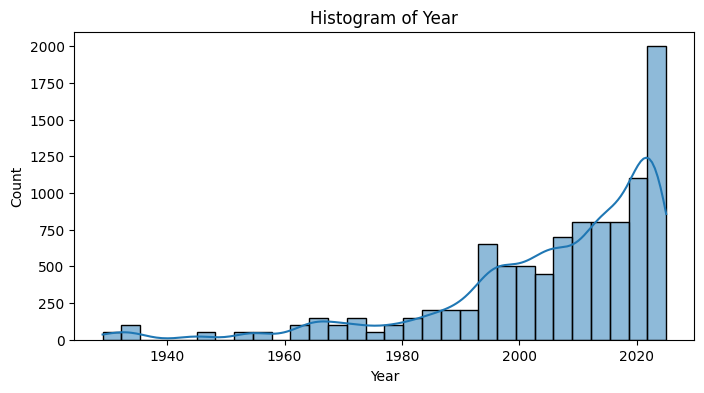

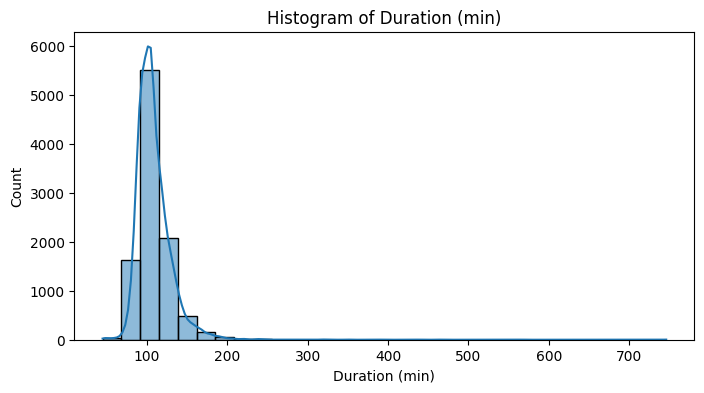

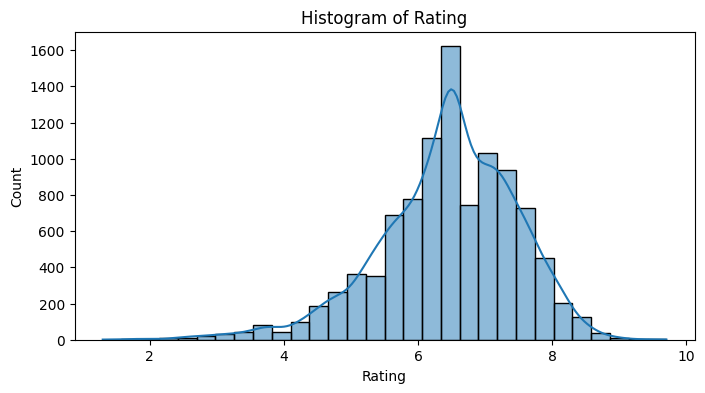

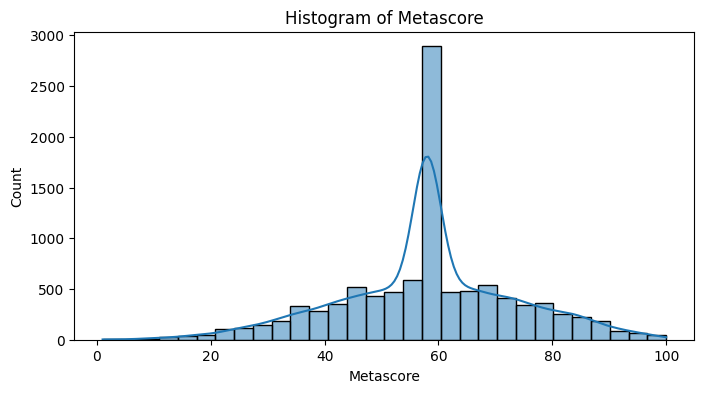

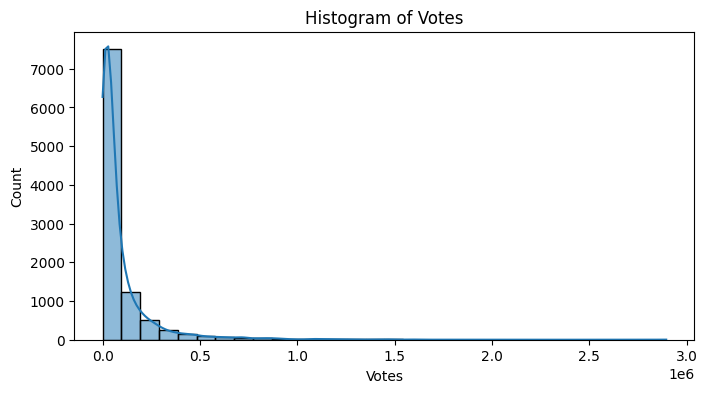

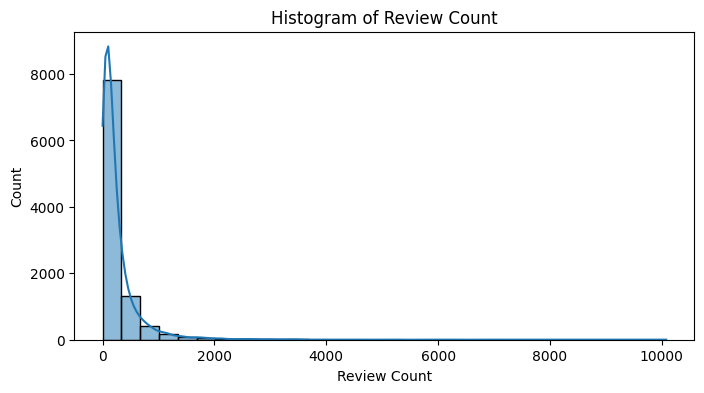

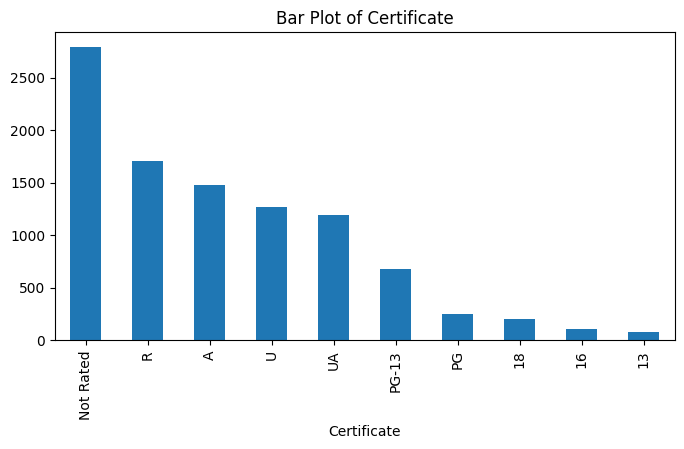

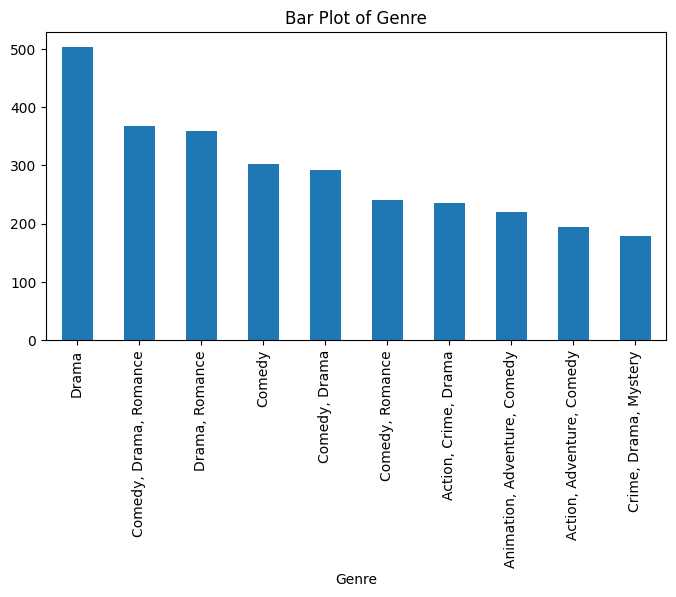

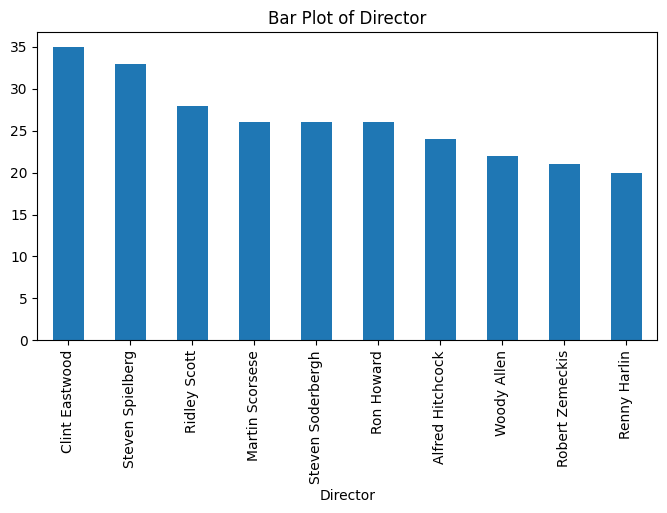

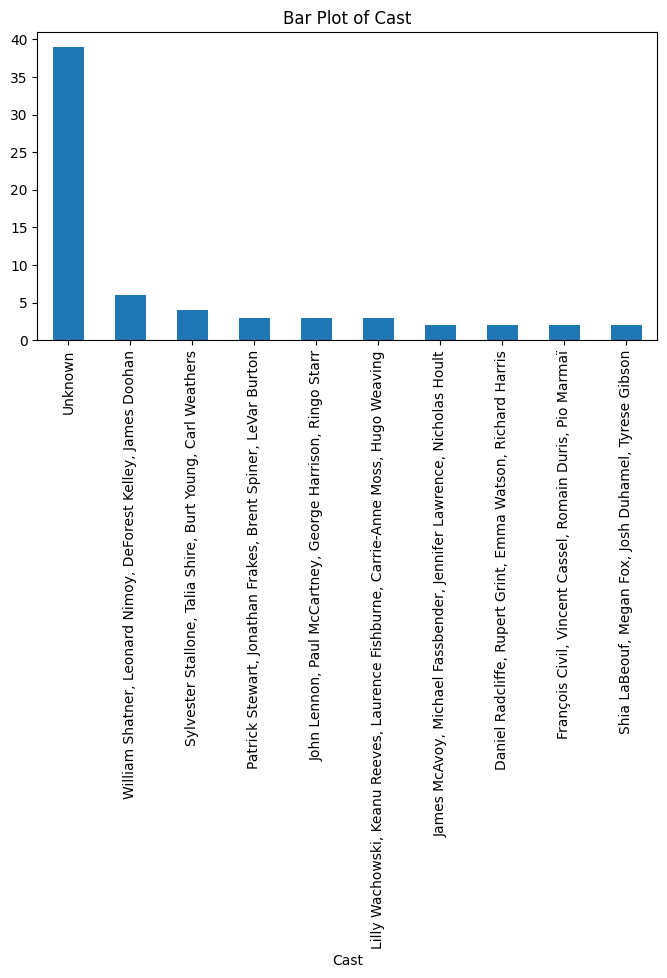

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for numerical features
numerical_columns = ['Year', 'Duration (min)', 'Rating', 'Metascore', 'Votes', 'Review Count']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()

# Univariate analysis for categorical features
categorical_columns = ['Certificate', 'Genre', 'Director', 'Cast']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().head(10).plot(kind='bar')  # Plot top 10 categories
    plt.title(f'Bar Plot of {col}')
    plt.show()


In [16]:
#The histogram of "Year" shows an increasing trend in movie production over time, with a significant surge in the late 20th and early 21st centuries.


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

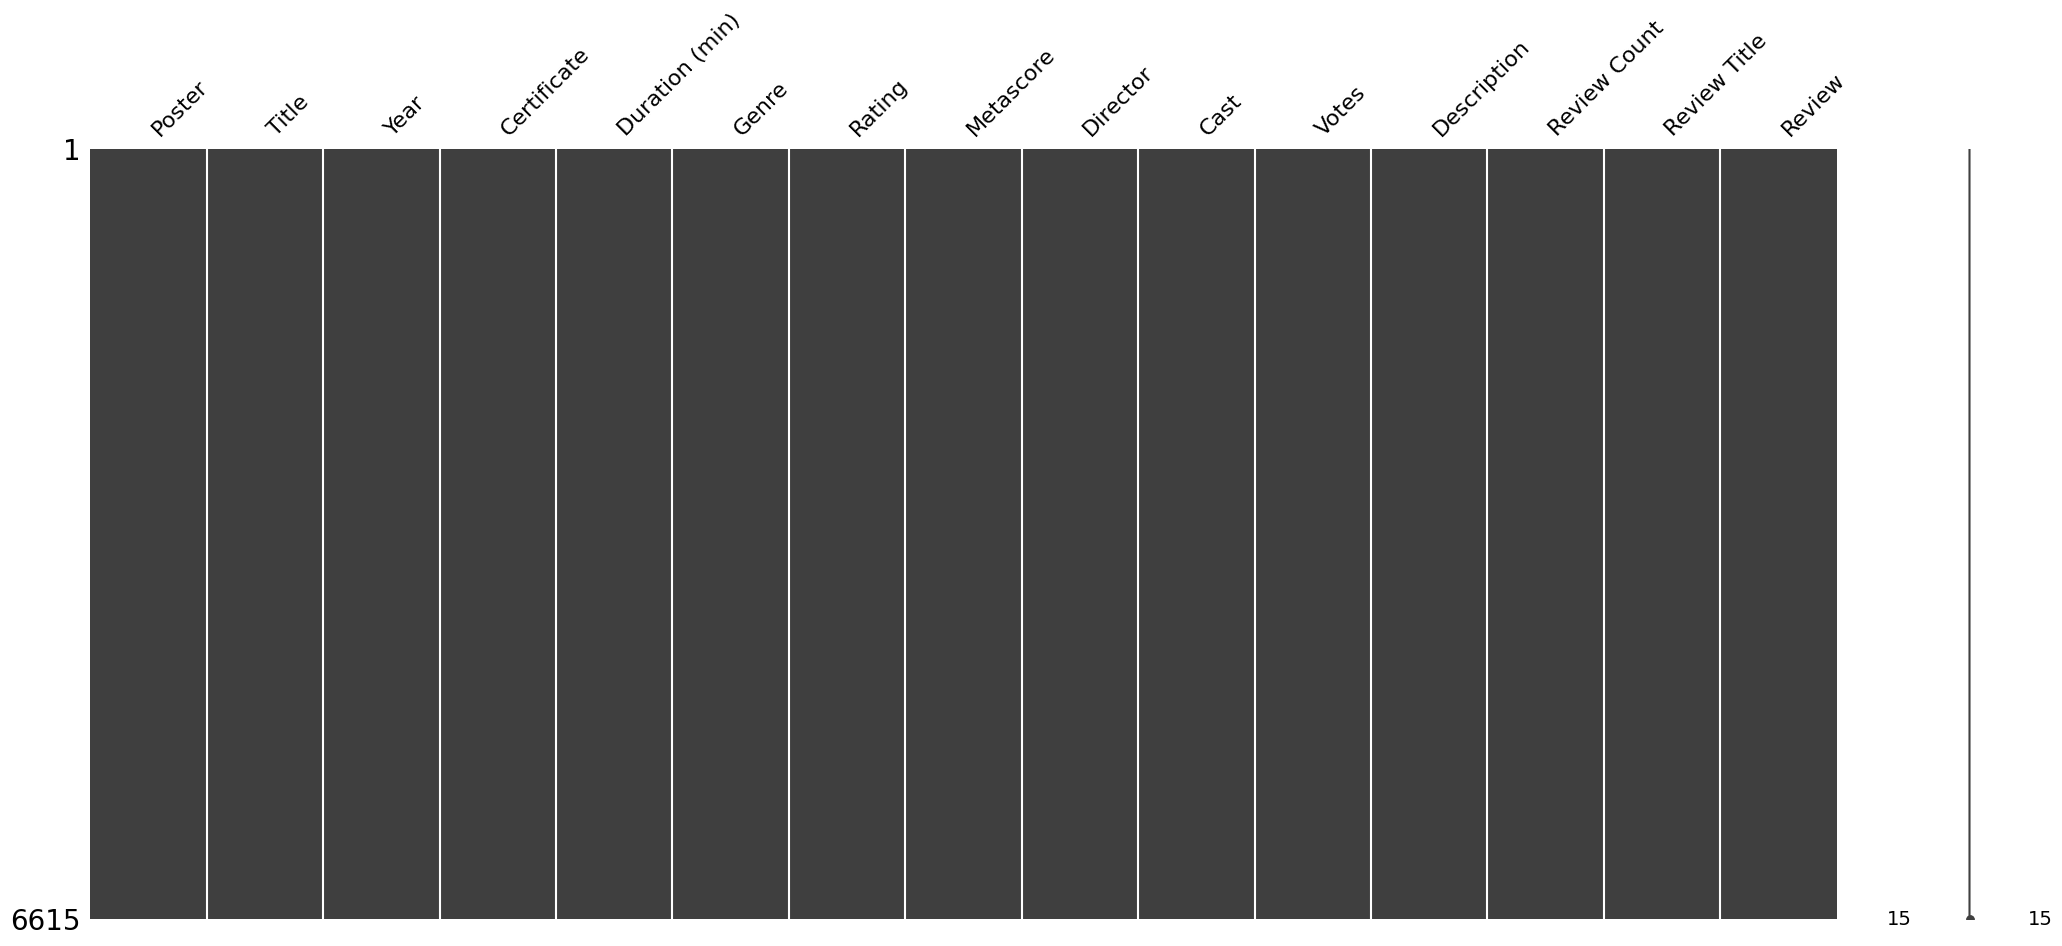

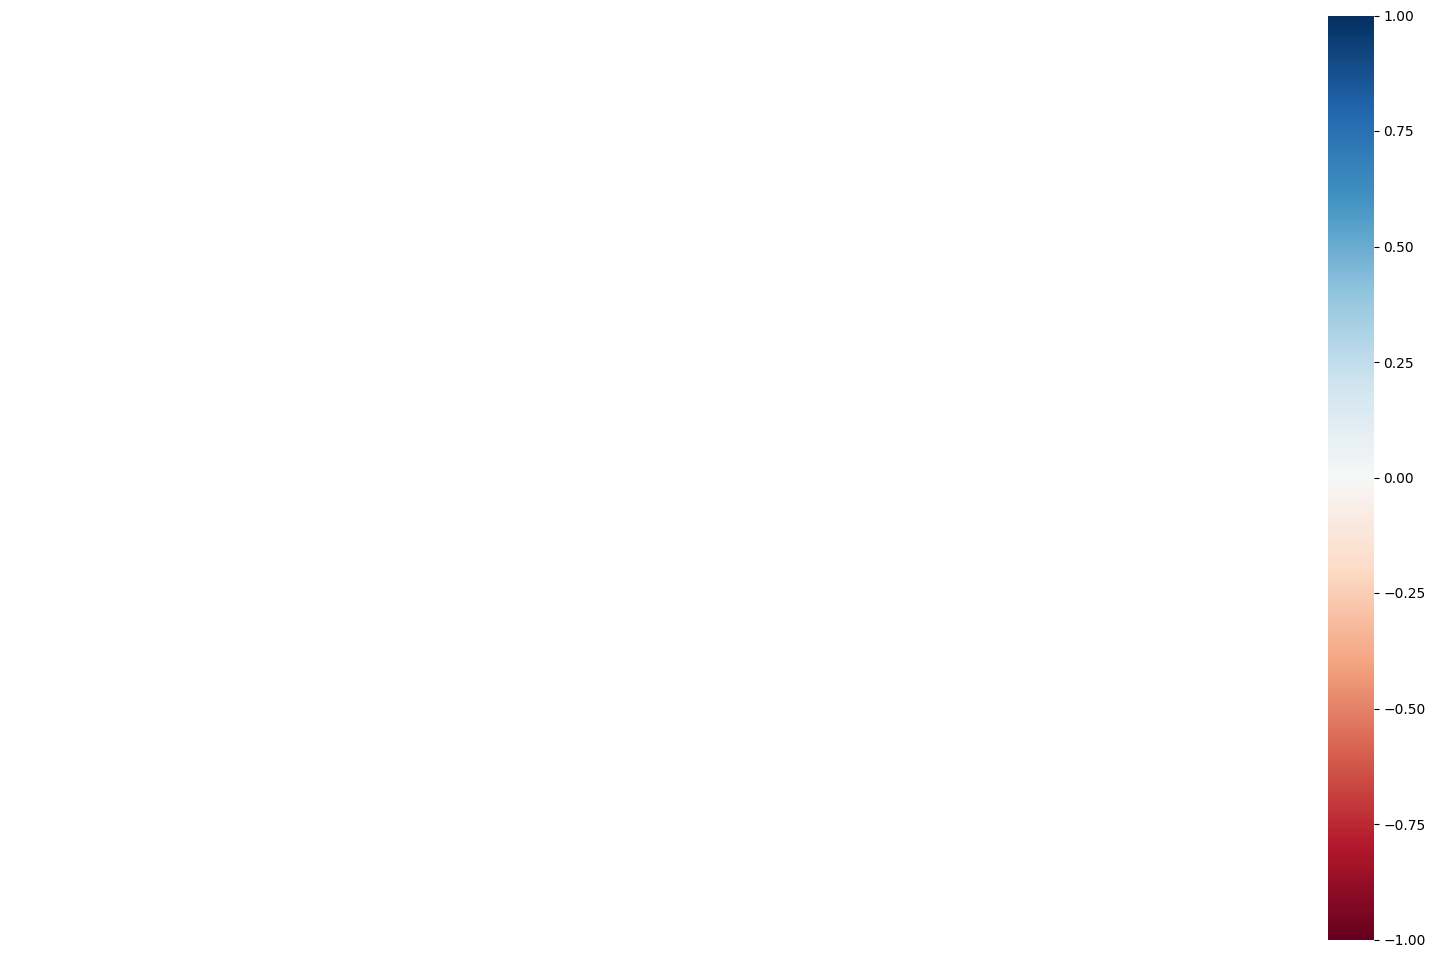

In [17]:
import missingno as msno
msno.matrix(df)
msno.heatmap(df)


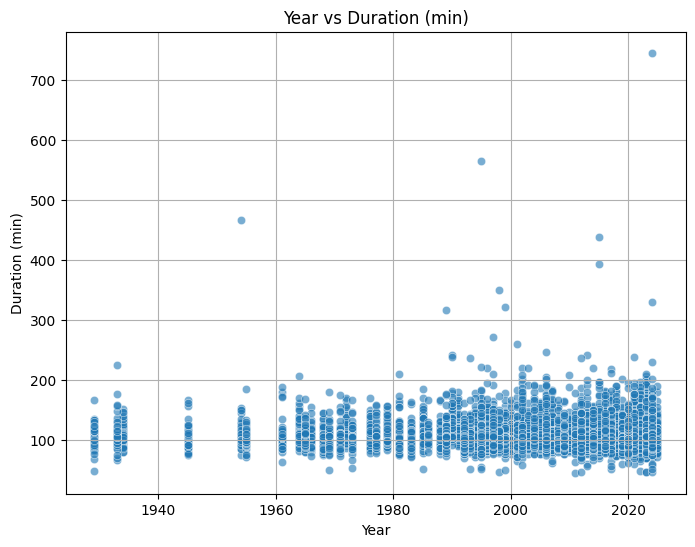

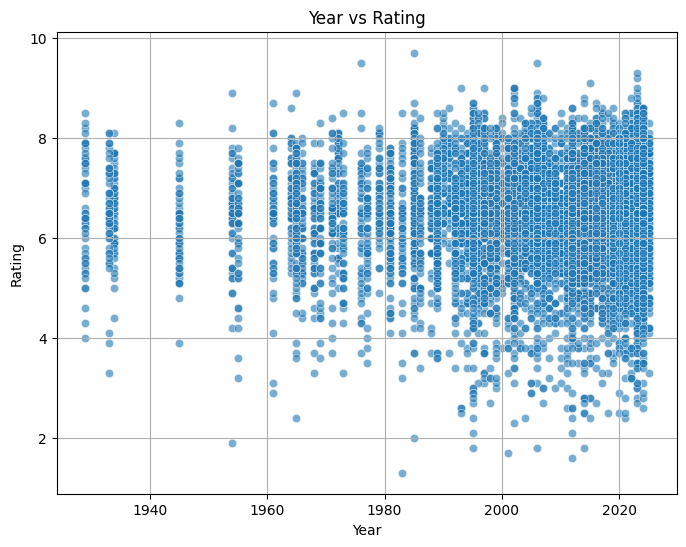

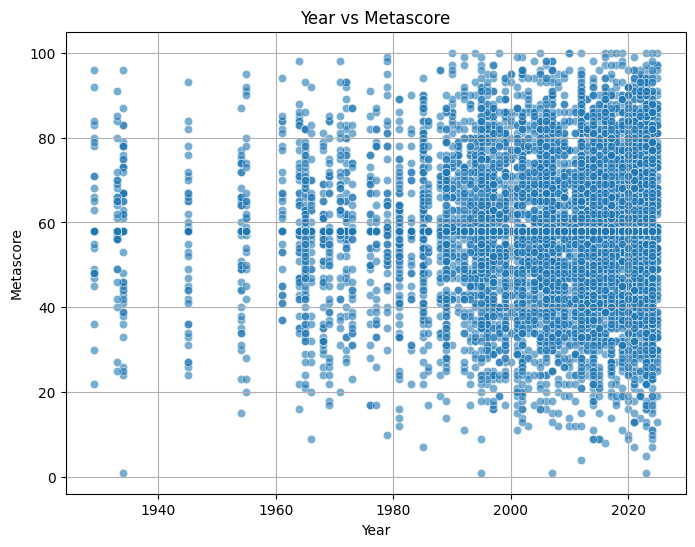

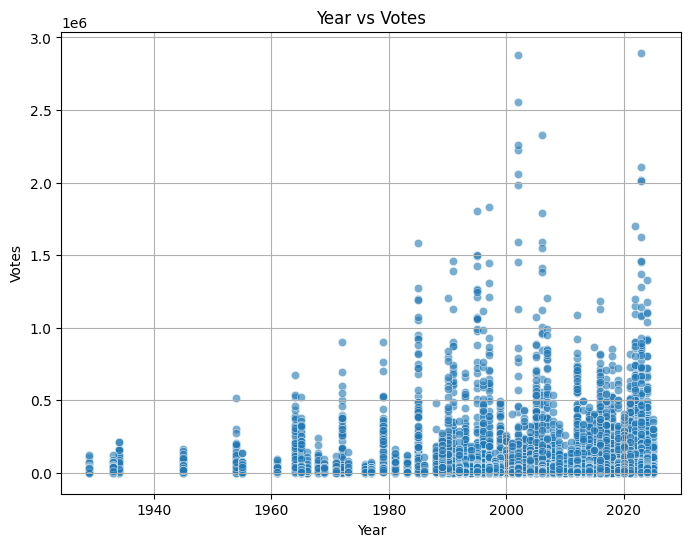

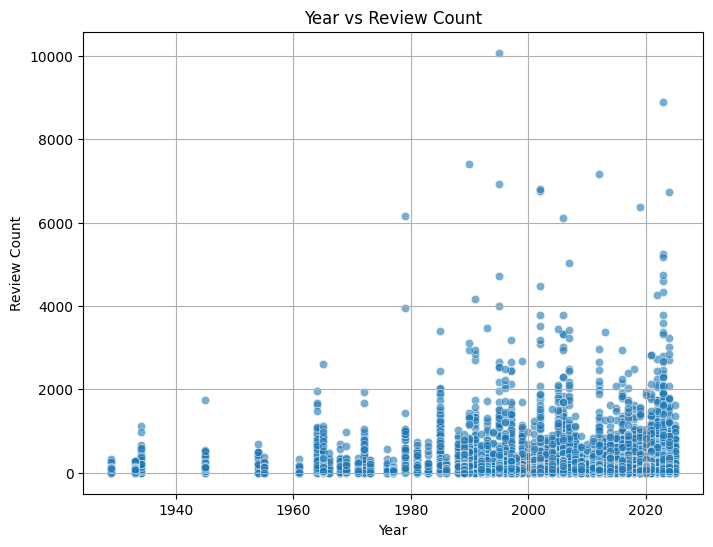

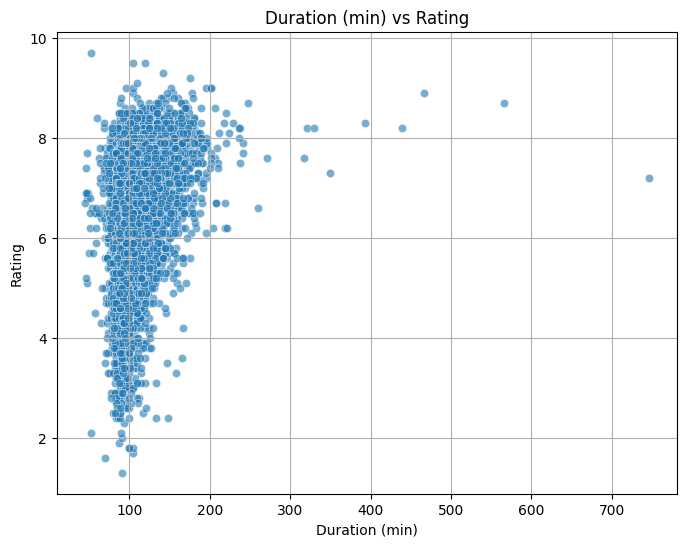

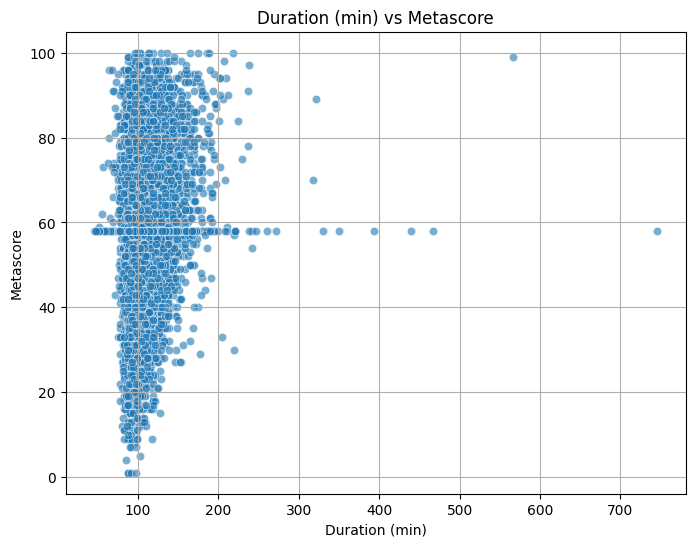

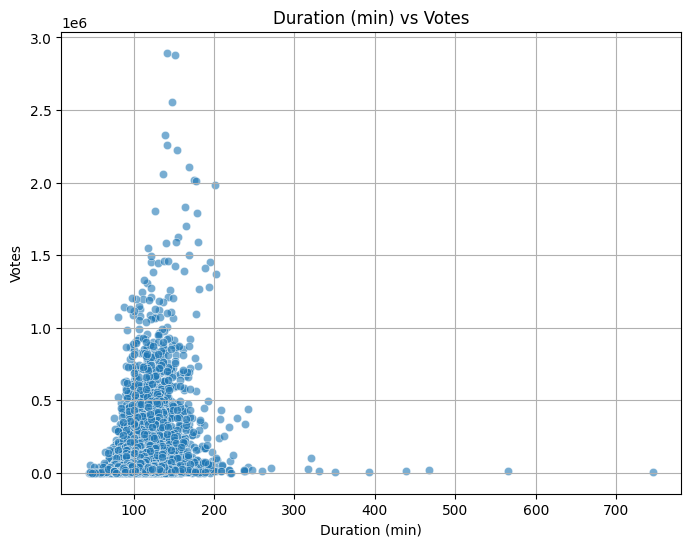

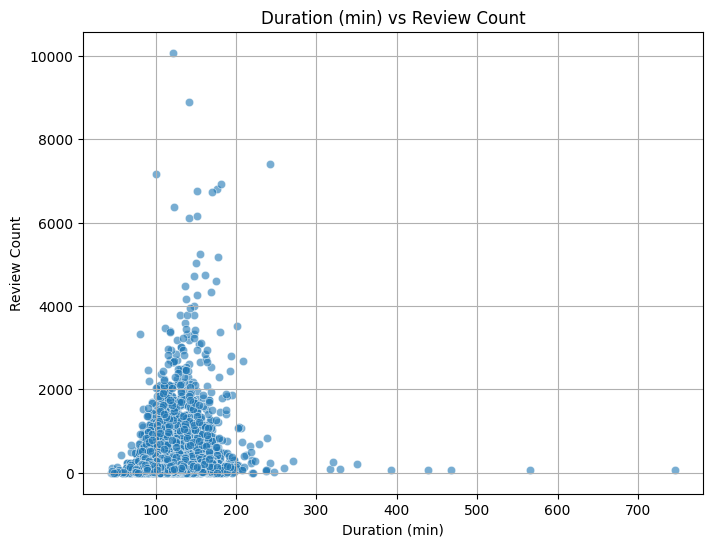

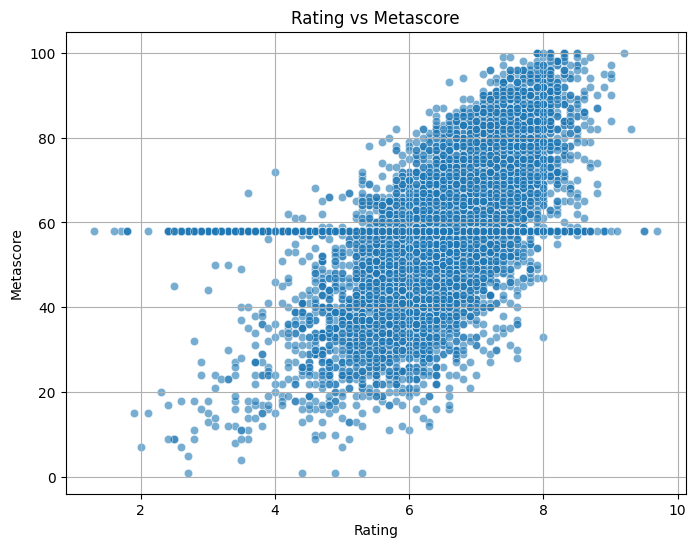

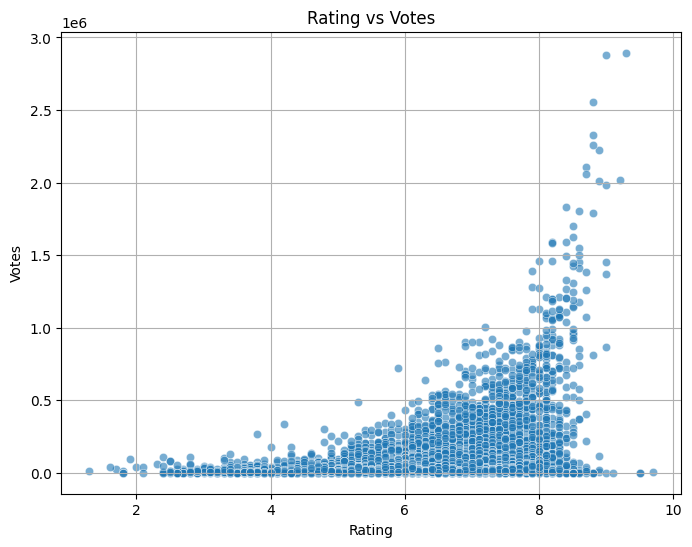

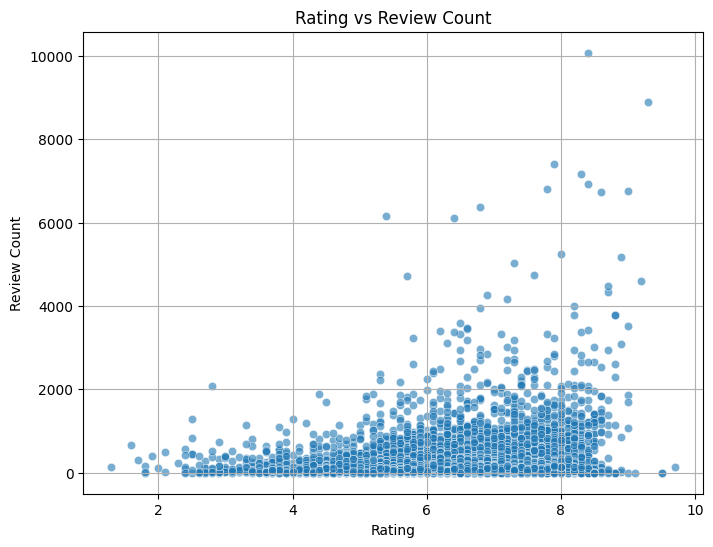

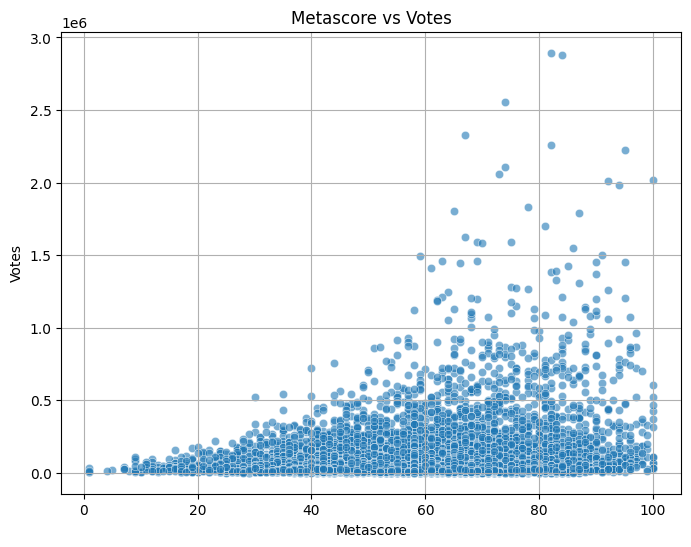

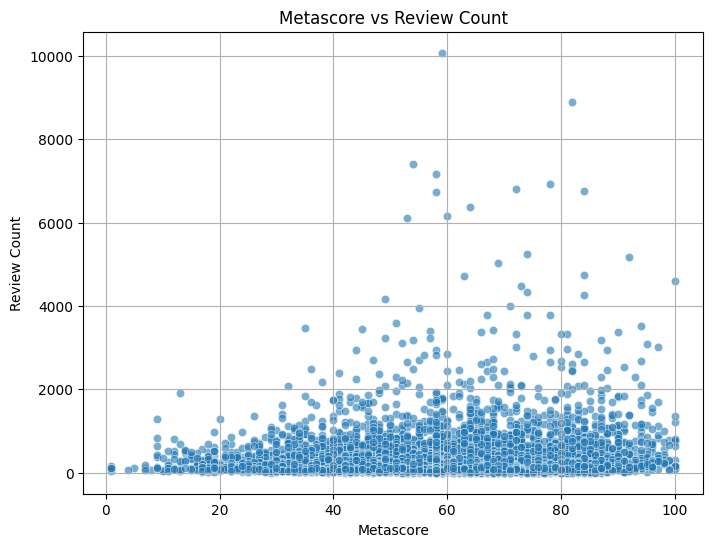

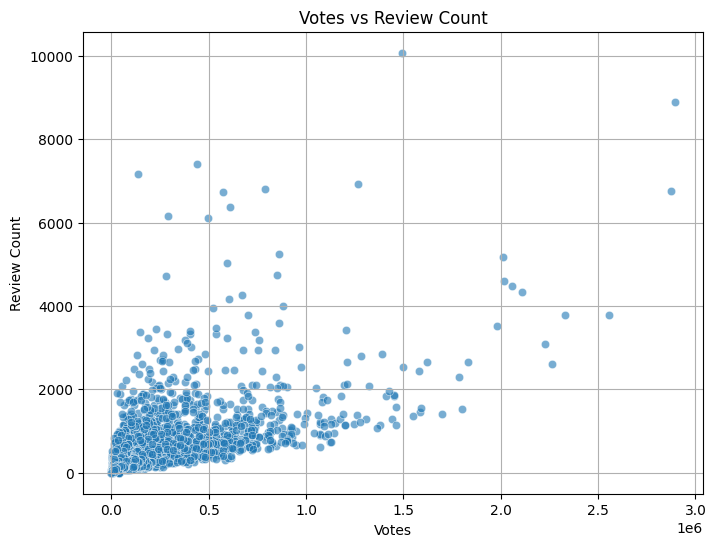

In [16]:
# Scatter plots for numerical features
numerical_columns = ['Year', 'Duration (min)', 'Rating', 'Metascore', 'Votes', 'Review Count']

for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[numerical_columns[i]], y=df[numerical_columns[j]], alpha=0.6)
        plt.title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.grid(True)
        plt.show()


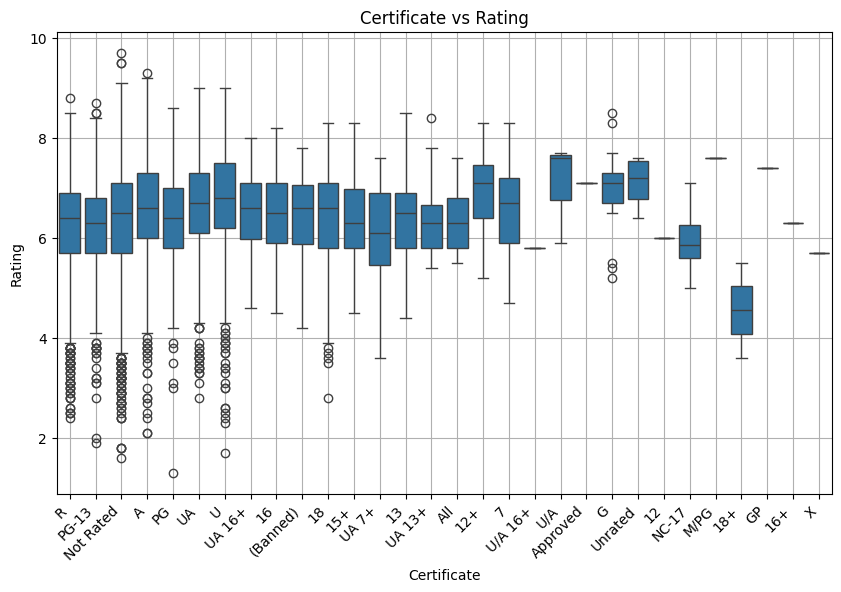

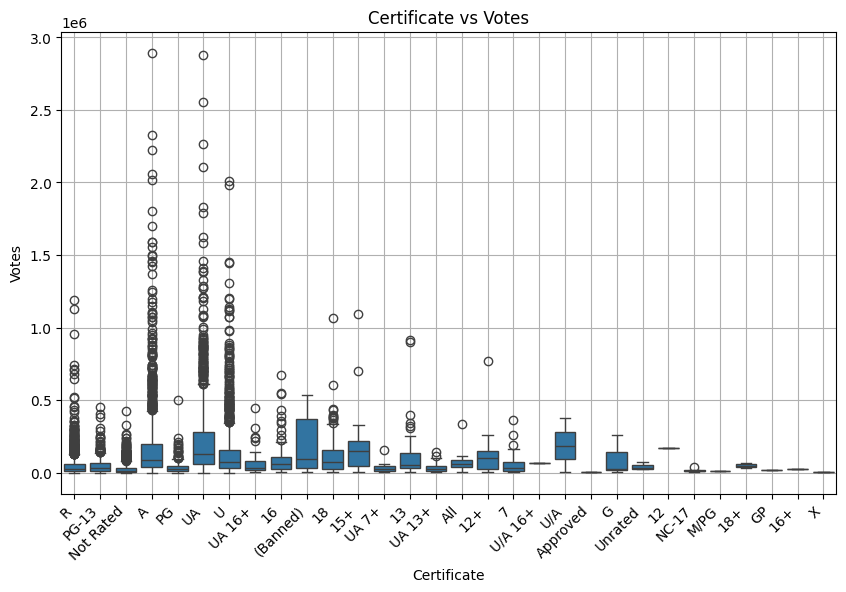

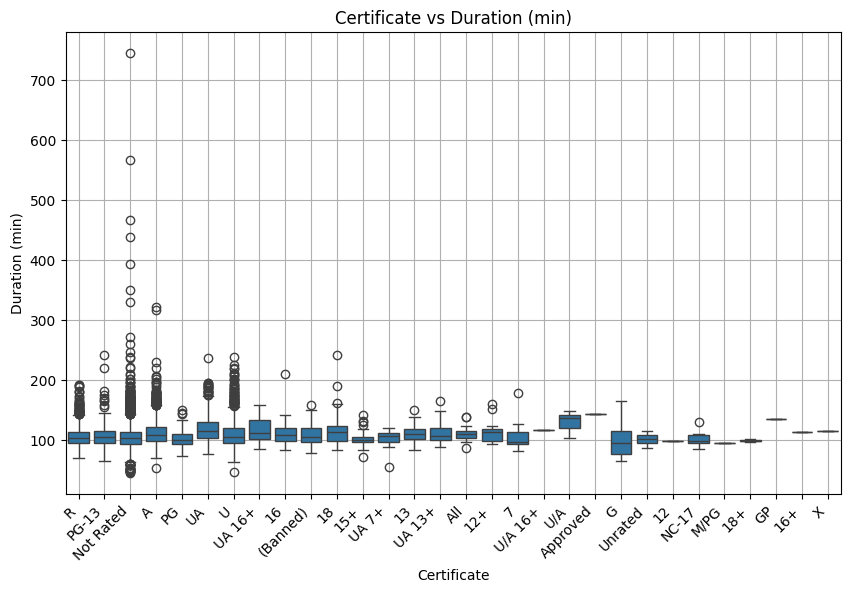

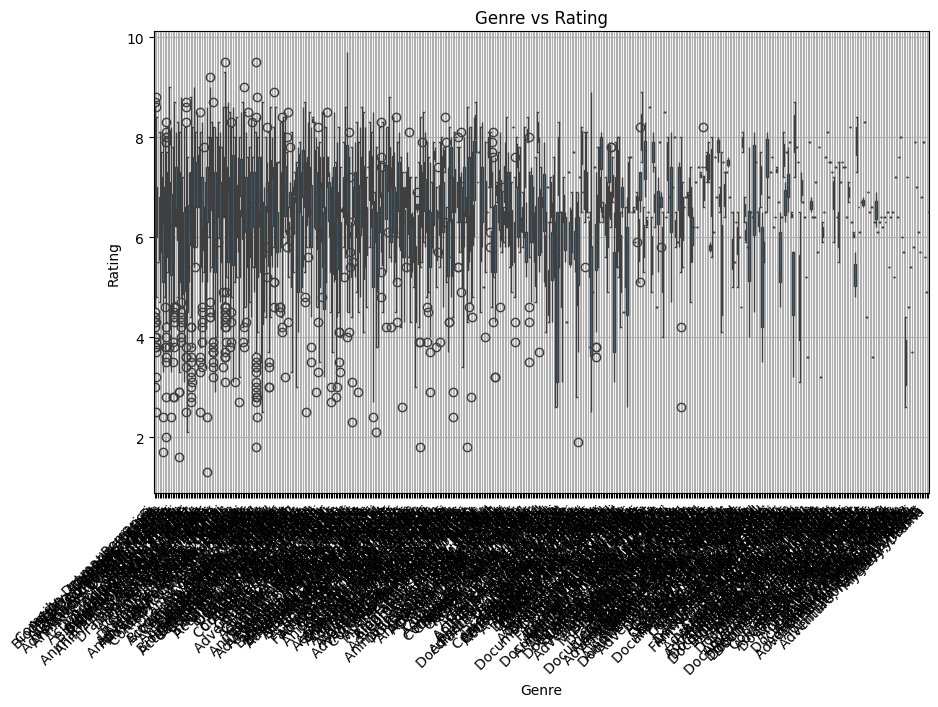

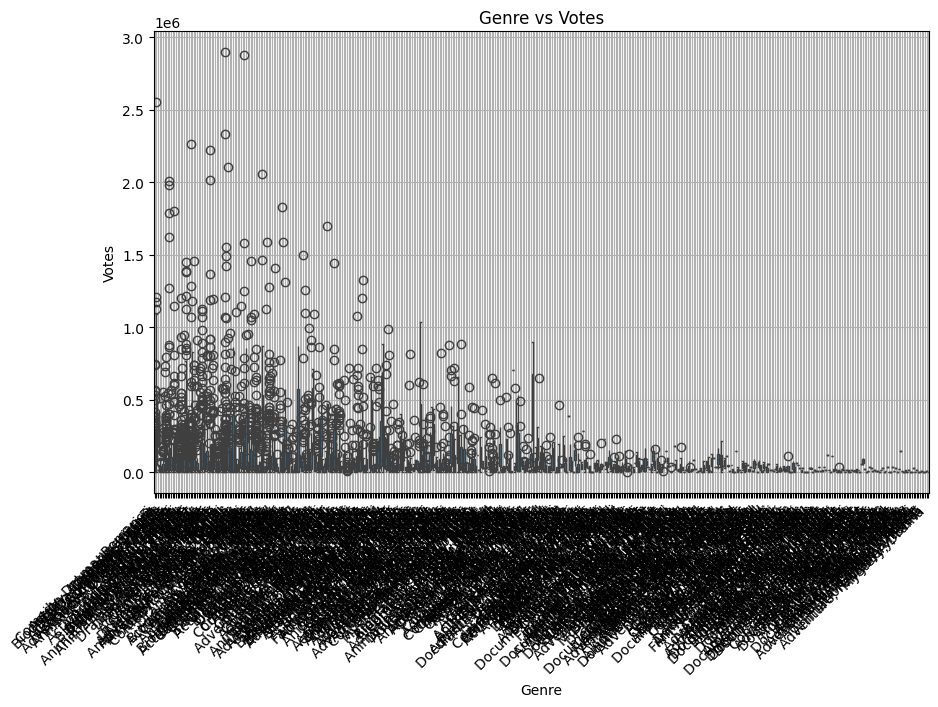

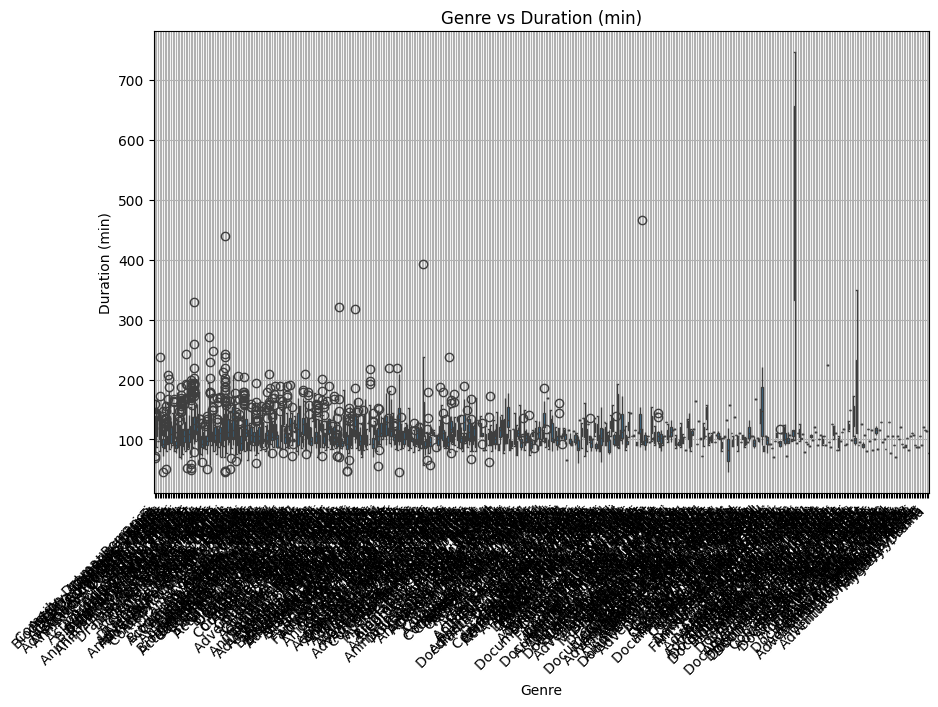

In [17]:
# Box plot for categorical vs numerical
categorical_columns = ['Certificate', 'Genre']

for cat_col in categorical_columns:
    for num_col in ['Rating', 'Votes', 'Duration (min)']:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{cat_col} vs {num_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.show()


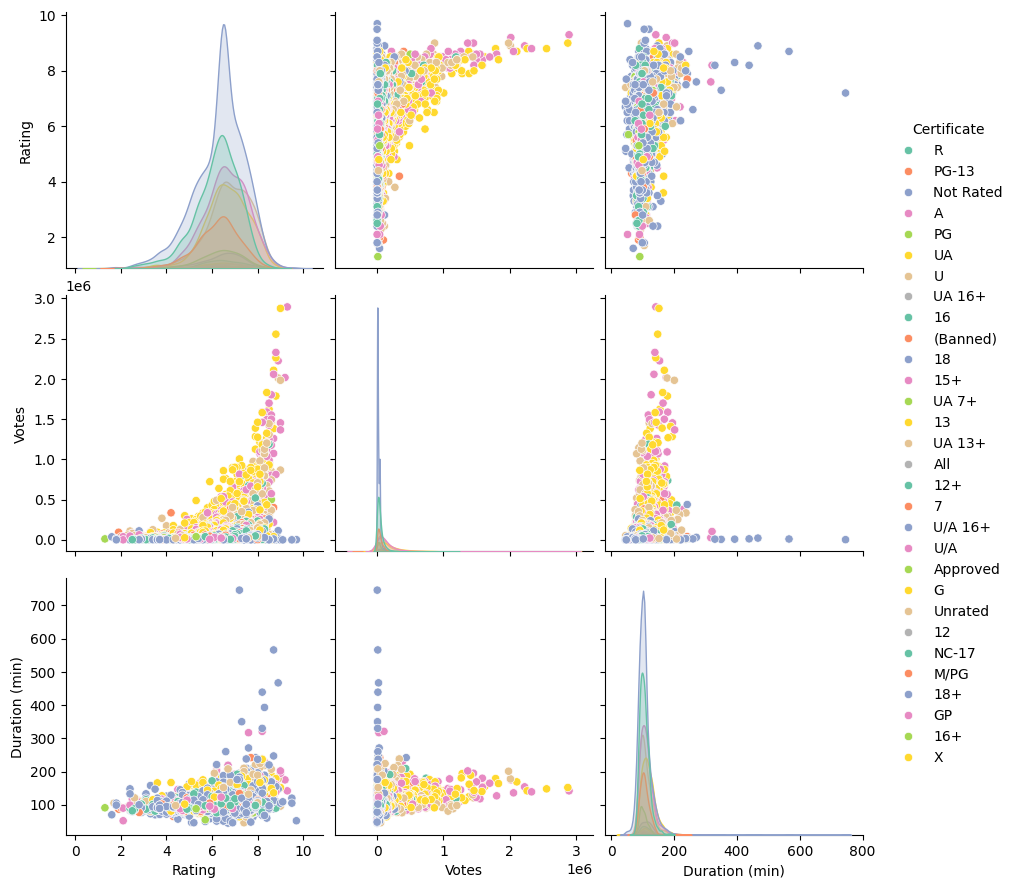

In [18]:
# Pairplot for numerical features with hue for categorical data
sns.pairplot(df, hue='Certificate', vars=['Rating', 'Votes', 'Duration (min)'], height=3, diag_kind='kde', palette='Set2')
plt.show()


More votes, generally higher ratings: Movies that are voted on more often tend to have better ratings.

---


Duration doesn't impact rating: Whether a movie is long or short doesn't seem to affect how well it's rated.

---


No clear link between votes and duration: The number of votes a movie gets isn't related to how long it is.

In [19]:
from scipy.stats import chi2_contingency

# Identify categorical features
categorical_columns = ['Certificate', 'Genre', 'Director', 'Cast']

# Function to compute Chi-Square test
def chi_square_test(df, categorical_columns):
    results = []
    for i in range(len(categorical_columns)):
        for j in range(i + 1, len(categorical_columns)):
            col1, col2 = categorical_columns[i], categorical_columns[j]
            # Create a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])

            # Perform Chi-Square test
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

            # Store the result
            results.append({
                'Feature 1': col1,
                'Feature 2': col2,
                'Chi2 Statistic': chi2_stat,
                'p-value': p_value,
                'Degrees of Freedom': dof
            })

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results)
    return results_df

# Perform the test
chi_square_results = chi_square_test(df, categorical_columns)

# Display results
chi_square_results.sort_values(by='p-value', ascending=True)


Feature 1 Feature 2  Chi2 Statistic        p-value  Degrees of Freedom
3        Genre  Director    2.461837e+06   0.000000e+00             2160775
1  Certificate  Director    1.453877e+05  2.311482e-142              131921
5     Director      Cast    4.523519e+07   3.793346e-74            45062394
0  Certificate     Genre    1.607132e+04   1.009783e-39               13775
2  Certificate      Cast    2.897219e+05   6.381879e-04              287274
4        Genre      Cast    4.709165e+06   1.068224e-01             4705350



*   **Directors often specialize in certain genres or work on films with specific certifications, indicating a clear pattern in filmmaking preferences.**
*   **There is a noticeable relationship between directors and the cast they work with, suggesting recurring collaborations in the industry.**

*   **Genre and cast combinations don’t show a strong dependency, implying casting decisions may not be tightly linked to the film's genre.**






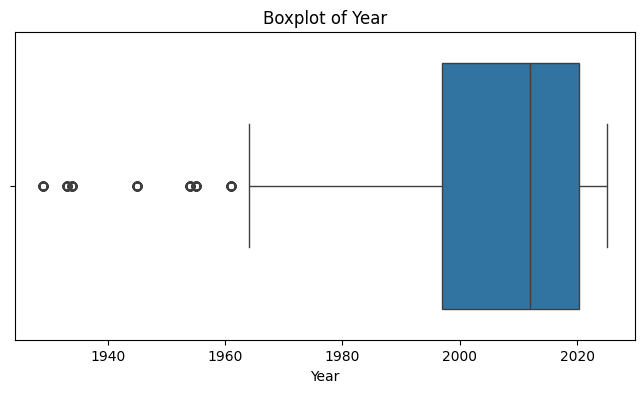

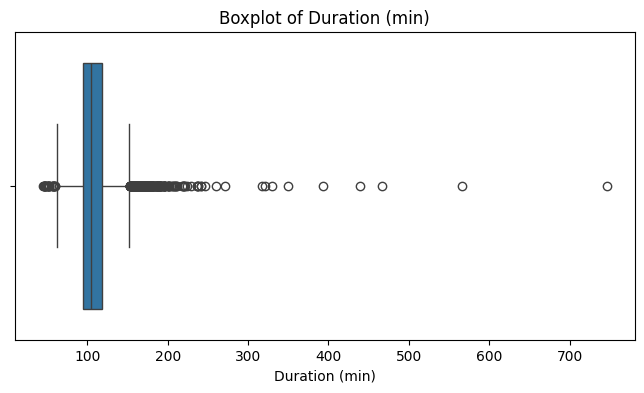

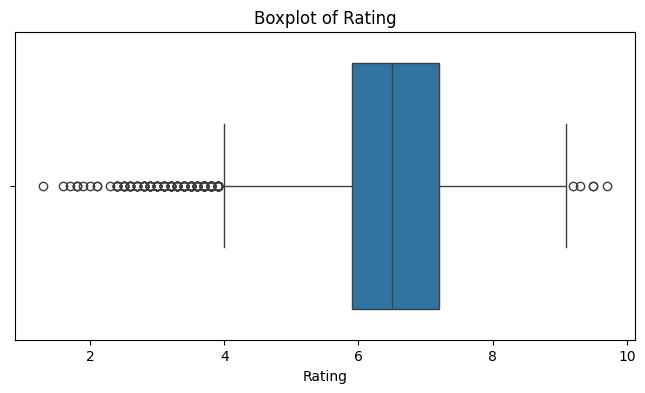

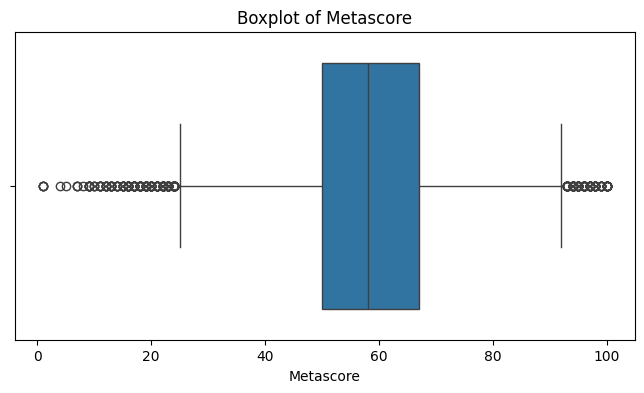

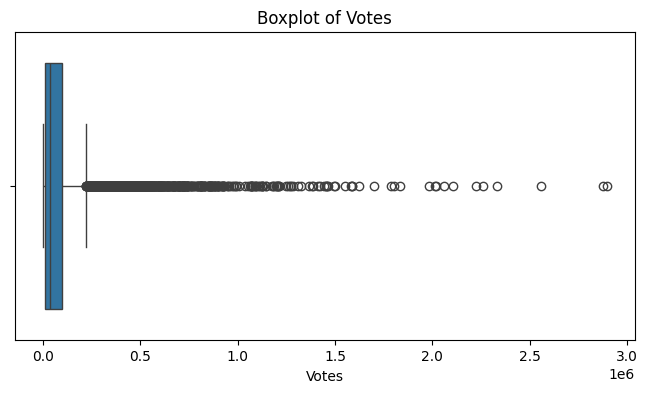

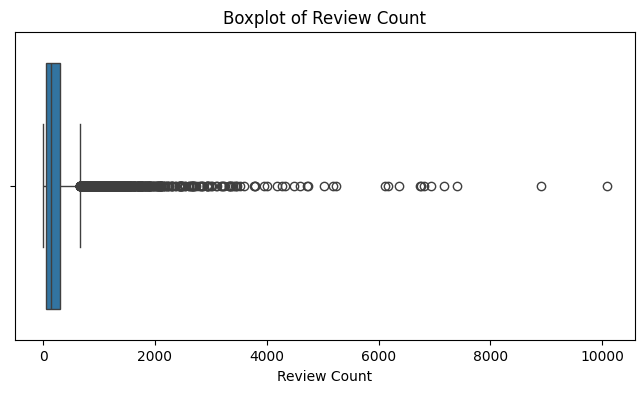

Outliers in Year: 200 rows
Outliers in Duration (min): 112 rows
Outliers in Rating: 98 rows
Outliers in Metascore: 27 rows
Outliers in Votes: 220 rows
Outliers in Review Count: 169 rows


In [20]:
# Boxplot to visualize outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Z-Score method to detect outliers
from scipy.stats import zscore

outliers = {}
for col in numerical_columns:
    z_scores = zscore(df[col])
    outliers[col] = df[(z_scores > 3) | (z_scores < -3)].index.tolist()
    print(f'Outliers in {col}: {len(outliers[col])} rows')


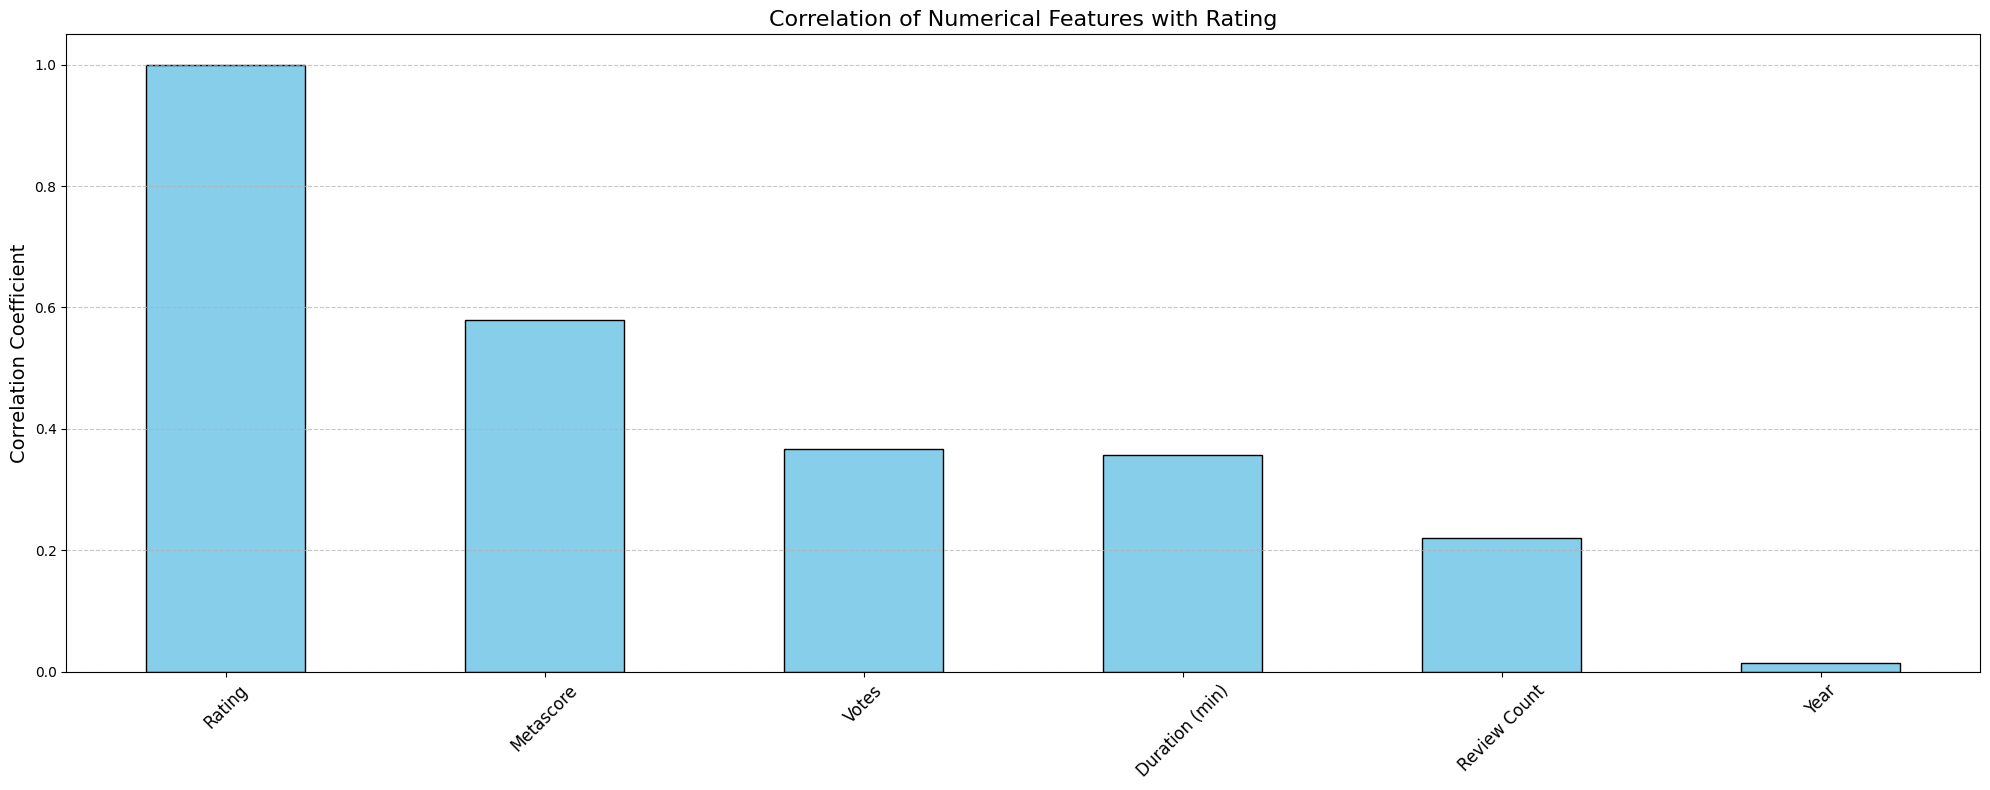

In [21]:
# Assuming 'df' is your cleaned dataset and 'Rating' is the target variable.
plt.figure(figsize=(20, 8))

# Compute the correlation of numerical features with 'Rating'
numerical_columns = ['Year', 'Duration (min)', 'Metascore', 'Votes', 'Review Count']
correlations = df[numerical_columns + ['Rating']].corr()['Rating'].sort_values(ascending=False)

# Plot the correlations
correlations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Numerical Features with Rating', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import numpy as np

# Define the columns to cap
# Corrected column name to 'Duration (min)'
numerical_columns = ['Year', 'Duration (min)', 'Rating', 'Metascore', 'Votes', 'Review Count']

# Function to cap the outliers
def cap_outliers(df, columns, lower_percentile=1, upper_percentile=99):
    for col in columns:
        # Calculate the lower and upper percentiles
        lower_limit = np.percentile(df[col], lower_percentile)
        upper_limit = np.percentile(df[col], upper_percentile)

        # Cap the values
        df[col] = np.clip(df[col], lower_limit, upper_limit)
    return df

# Apply capping
df = cap_outliers(df, numerical_columns)

# Check if the outliers are handled
for col in numerical_columns:
    print(f'Outliers in {col}:')
    print(f'Lower limit: {np.percentile(df[col], 1)}')
    print(f'Upper limit: {np.percentile(df[col], 99)}')
    print(f'Outliers handled for {col}')

Outliers in Year:
Lower limit: 1933.9999
Upper limit: 2025.0
Outliers handled for Year
Outliers in Duration (min):
Lower limit: 76.0
Upper limit: 179.0
Outliers handled for Duration (min)
Outliers in Rating:
Lower limit: 3.4
Upper limit: 8.4
Outliers handled for Rating
Outliers in Metascore:
Lower limit: 18.9999
Upper limit: 94.0
Outliers handled for Metascore
Outliers in Votes:
Lower limit: 103.9997
Upper limit: 867269.2754
Outliers handled for Votes
Outliers in Review Count:
Lower limit: 0.0
Upper limit: 2087.0003
Outliers handled for Review Count


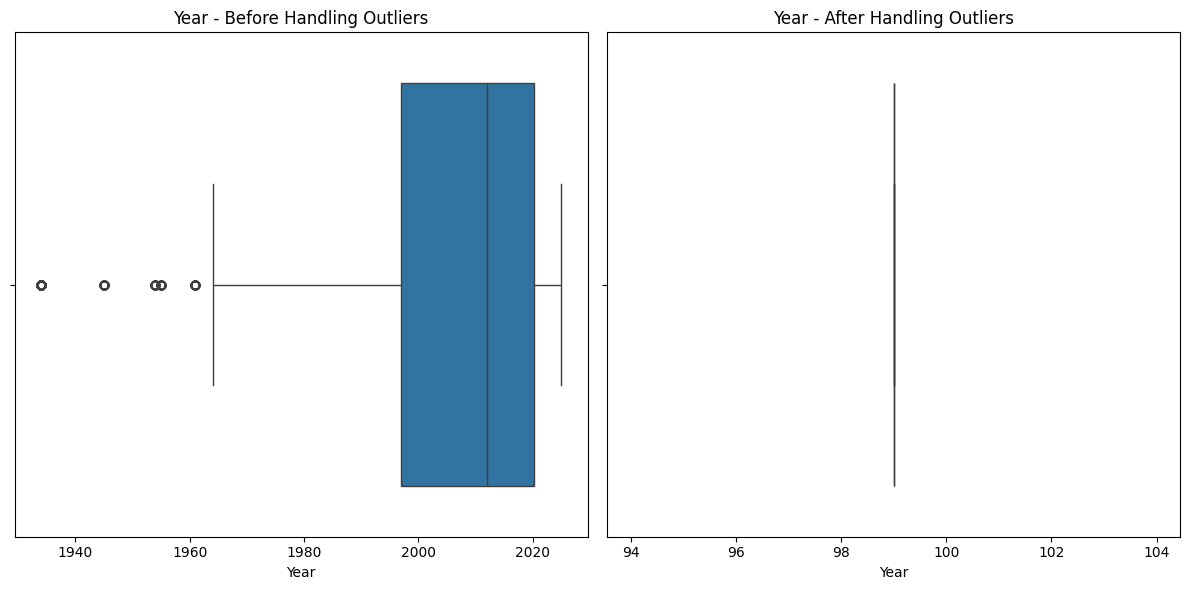

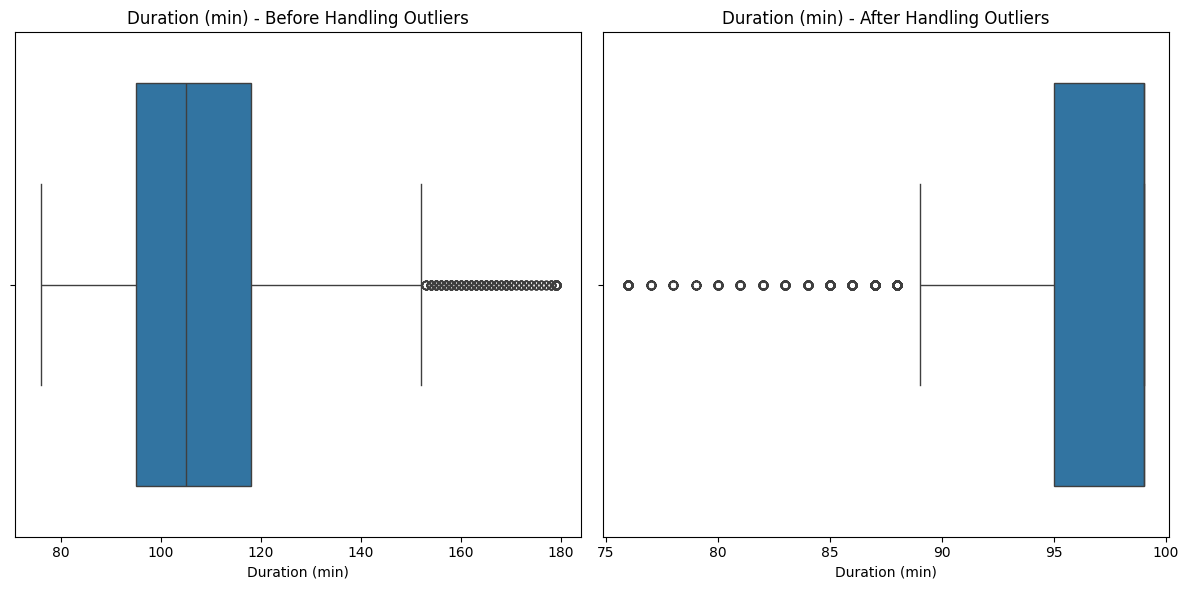

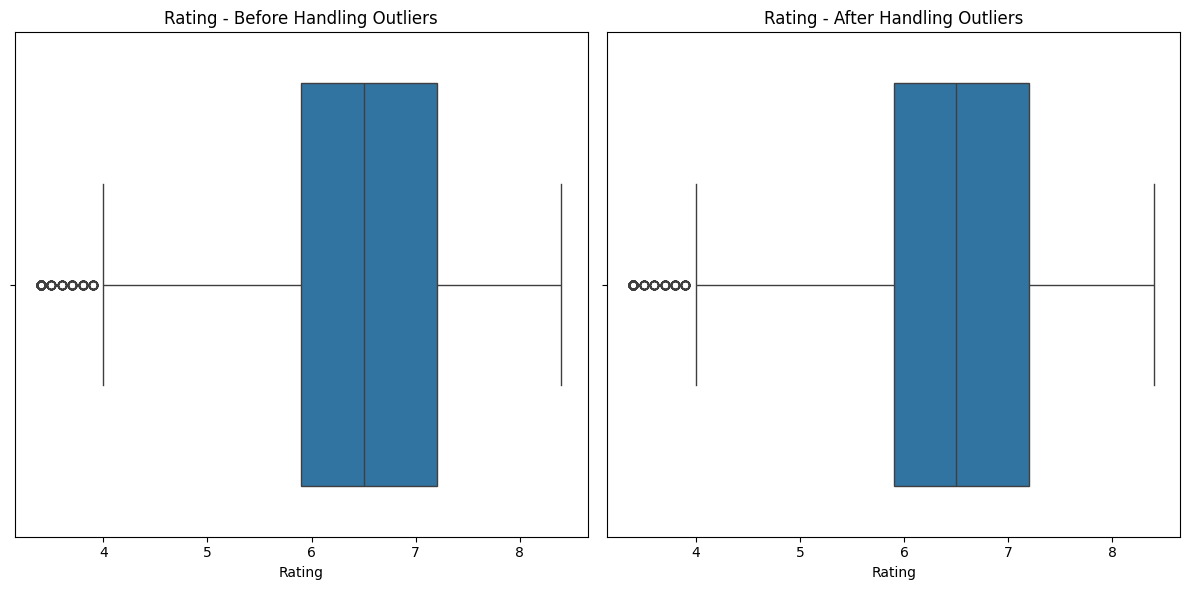

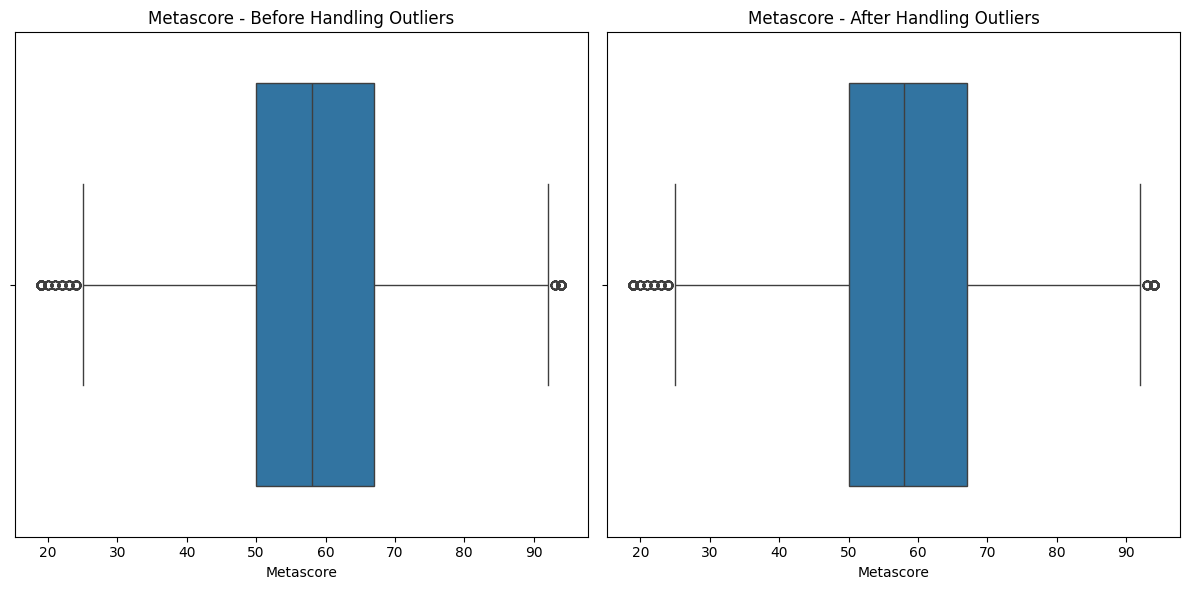

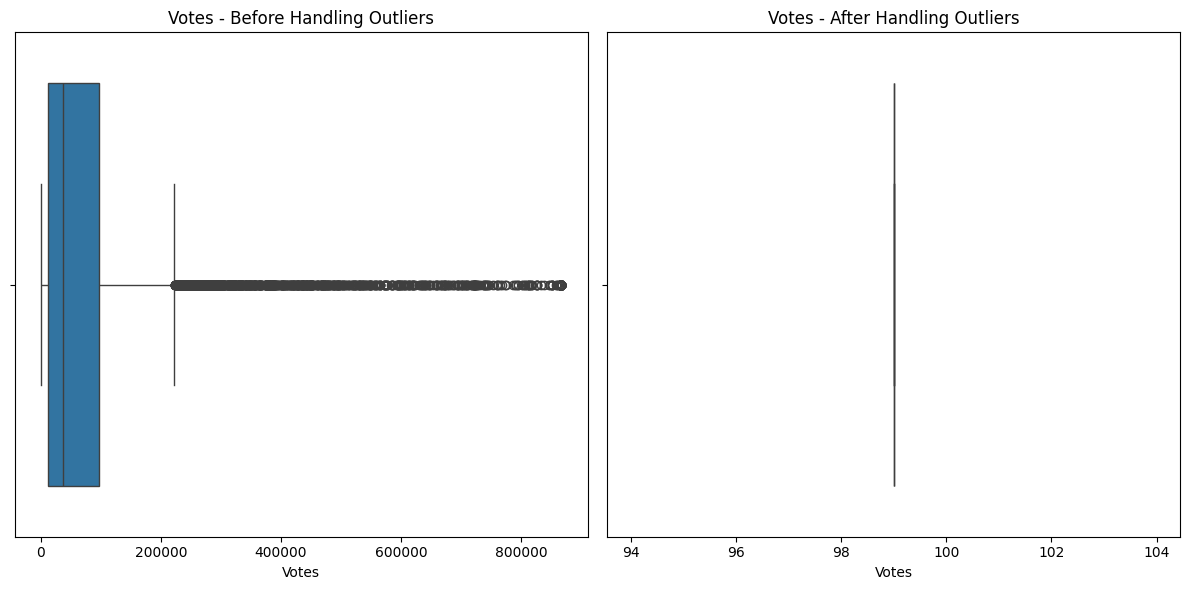

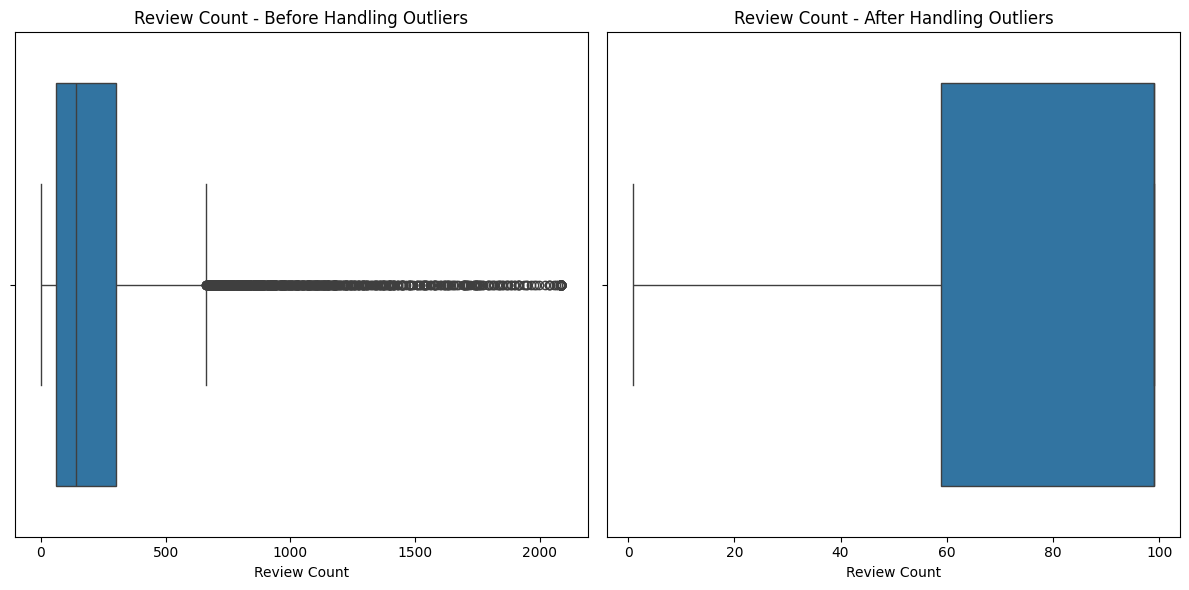

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of numerical columns to compare
numerical_columns = ['Year', 'Duration (min)', 'Rating', 'Metascore', 'Votes', 'Review Count']

# Define lower and upper percentiles for each column (you can adjust these)
lower_percentile = {col: 1 for col in numerical_columns}  # 1st percentile
upper_percentile = {col: 99 for col in numerical_columns} # 99th percentile

# Plotting before and after handling outliers
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Plot before handling outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'{col} - Before Handling Outliers')

    # Apply capping (after handling outliers)
    df_capped = df.copy()
    lower_limit, upper_limit = lower_percentile[col], upper_percentile[col]
    df_capped[col] = df_capped[col].clip(lower=lower_limit, upper=upper_limit)

    # Plot after handling outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_capped[col])
    plt.title(f'{col} - After Handling Outliers')

    plt.tight_layout()
    plt.show()